In [1]:
import matplotlib.pyplot as plt
import torch
import seaborn as sns
import numpy as np

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams.update({'font.size': 17, 'legend.fontsize': 17})    

rank = 10
rng = np.arange(0, rank) + 1
ticks = np.arange(0, (len(rng) + 1), 1)

def get_avg(fpr_val, tpr_val):
    range_eval = np.arange(0, 1, 1e-6)
    # total_fpr = np.empty((0, range_eval.shape[0]), int)
    total_tpr = np.empty((0, range_eval.shape[0]), int)
    
    for ds in fpr_val:
        interp_y = np.interp(range_eval, fpr_val[ds], tpr_val[ds])
        total_tpr = np.append(total_tpr, np.array([interp_y]), axis=0)
    avg_tpr = np.mean(total_tpr, axis=0)

    return range_eval, avg_tpr

In [2]:
# AELNet
cm_cmc_dict_p = torch.load('../data/cmc/AELNet/cm/cm_cmc_dict_p.pt')
cm_avg_dict_p = torch.load('../data/cmc/AELNet/cm/cm_avg_dict_p.pt')
cm_cmc_dict_f = torch.load('../data/cmc/AELNet/cm/cm_cmc_dict_f.pt')
cm_avg_dict_f = torch.load('../data/cmc/AELNet/cm/cm_avg_dict_f.pt')

# HA-ViT
ha_vit_cm_cmc_dict_p = torch.load('../data/cmc/ha_vit/cm/cm_cmc_dict_p.pt')
ha_vit_cm_avg_dict_p = torch.load('../data/cmc/ha_vit/cm/cm_avg_dict_p.pt')
ha_vit_cm_cmc_dict_f = torch.load('../data/cmc/ha_vit/cm/cm_cmc_dict_f.pt')
ha_vit_cm_avg_dict_f = torch.load('../data/cmc/ha_vit/cm/cm_avg_dict_f.pt')

# CMB-Net
cb_net_cm_cmc_dict_p = torch.load('../data/cmc/cb_net/cm/cm_cmc_dict_p.pt')
cb_net_cm_avg_dict_p = torch.load('../data/cmc/cb_net/cm/cm_avg_dict_p.pt')
cb_net_cm_cmc_dict_f = torch.load('../data/cmc/cb_net/cm/cm_cmc_dict_f.pt')
cb_net_cm_avg_dict_f = torch.load('../data/cmc/cb_net/cm/cm_avg_dict_f.pt')

In [3]:
# AELNet
cm_eer_dict = torch.load('../data/roc/AELNet/cm/cm_eer_dict.pt')
cm_fpr_dict = torch.load('../data/roc/AELNet/cm/cm_fpr_dict.pt')
cm_tpr_dict = torch.load('../data/roc/AELNet/cm/cm_tpr_dict.pt')
cm_auc_dict = torch.load('../data/roc/AELNet/cm/cm_auc_dict.pt')

# ha_vit
ha_vit_cm_eer_dict = torch.load('../data/roc/ha_vit/cm/cm_eer_dict.pt')
ha_vit_cm_fpr_dict = torch.load('../data/roc/ha_vit/cm/cm_fpr_dict.pt')
ha_vit_cm_tpr_dict = torch.load('../data/roc/ha_vit/cm/cm_tpr_dict.pt')
ha_vit_cm_auc_dict = torch.load('../data/roc/ha_vit/cm/cm_auc_dict.pt')

# cb_net
cb_net_cm_eer_dict = torch.load('../data/roc/cb_net/cm/cm_eer_dict.pt')
cb_net_cm_fpr_dict = torch.load('../data/roc/cb_net/cm/cm_fpr_dict.pt')
cb_net_cm_tpr_dict = torch.load('../data/roc/cb_net/cm/cm_tpr_dict.pt')
cb_net_cm_auc_dict = torch.load('../data/roc/cb_net/cm/cm_auc_dict.pt')

In [4]:
cm_avg, ha_vit_cm_avg, cb_net_cm_avg = [], [], []

for ds_ in cm_auc_dict:
    cm_avg.append(cm_auc_dict[ds_])
    ha_vit_cm_avg.append(ha_vit_cm_auc_dict[ds_])
    cb_net_cm_avg.append(cb_net_cm_auc_dict[ds_])

cm_avg = np.mean(np.array(cm_avg), 0)
ha_vit_cm_avg = np.mean(np.array(ha_vit_cm_avg), 0)
cb_net_cm_avg = np.mean(np.array(cb_net_cm_avg), 0)

range_, cm_tpr = get_avg(cm_fpr_dict, cm_tpr_dict)
range_, ha_vit_cm_tpr = get_avg(ha_vit_cm_fpr_dict, ha_vit_cm_tpr_dict)
range_, cb_net_cm_tpr = get_avg(cb_net_cm_fpr_dict, cb_net_cm_tpr_dict)

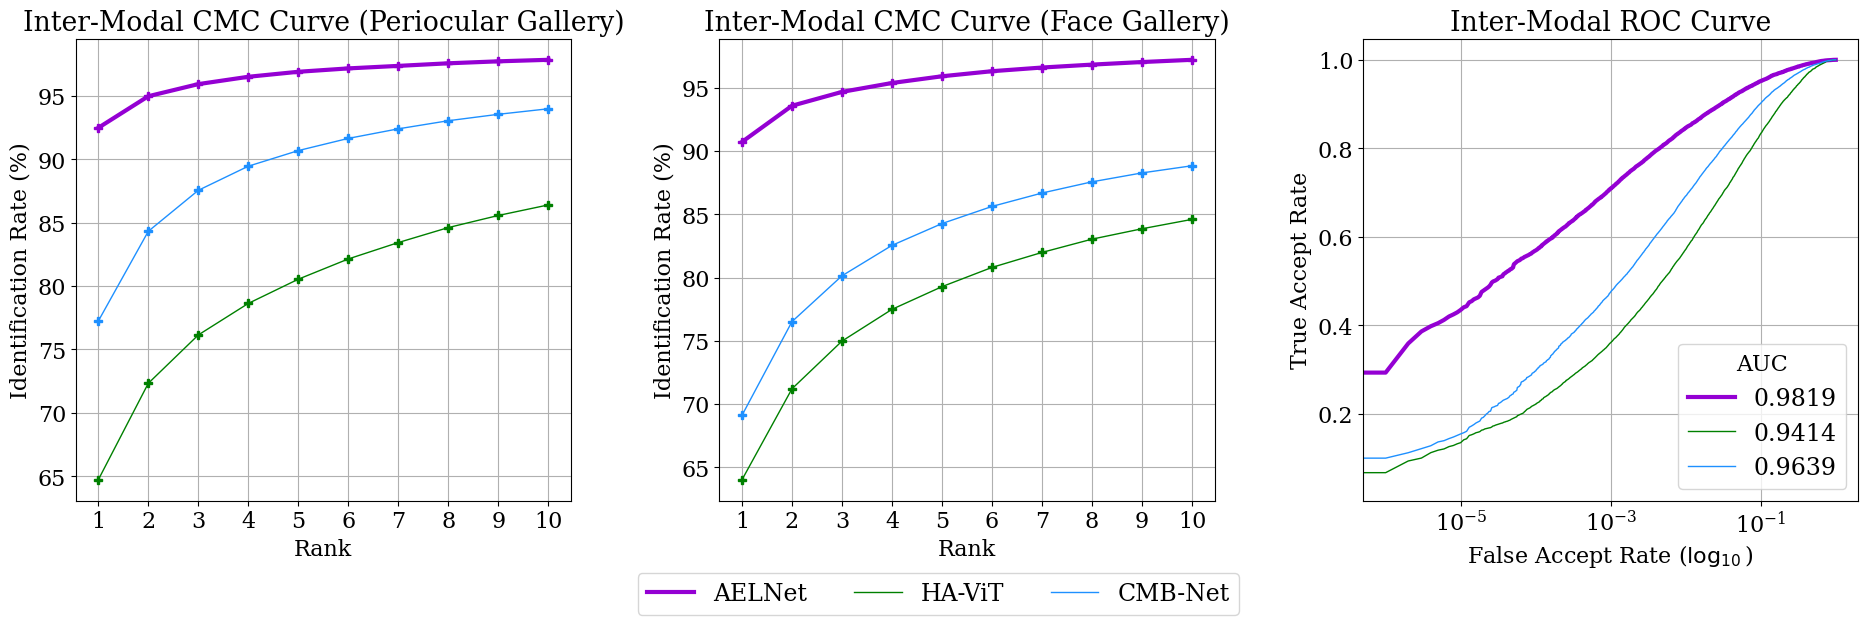

<Figure size 640x480 with 0 Axes>

In [6]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams.update({'font.size': 16, 'legend.fontsize': 17})    

fig, axs = plt.subplots(nrows=1, ncols=3)
fig.set_figheight(6)
fig.set_figwidth(23)
plt.subplots_adjust(wspace=0.3)

# Inter-Modal CMC Curve (Periocular Gallery)
axs[0].grid(which='both')
axs[0].set_xticks(ticks)
axs[0].set_title('Inter-Modal CMC Curve (Periocular Gallery)')
axs[0].set_ylabel('Identification Rate (%)', loc='center')
axs[0].set_xlabel('Rank')
peri_cm_cmc = axs[0].plot(rng, 100 * cm_avg_dict_p['avg'], marker = 'P', color = 'darkviolet', linewidth=3)
ha_vit_peri_cm_cmc = axs[0].plot(rng, 100 * ha_vit_cm_avg_dict_p['avg'], marker = 'P', color = 'green', linewidth=1)
icpr_peri_cm_cmc = axs[0].plot(rng, 100 * cb_net_cm_avg_dict_p['avg'], marker = 'P', color = 'dodgerblue', linewidth=1)

# Inter-Modal CMC Curve (Face Gallery)
axs[1].grid(which='both')
axs[1].set_xticks(ticks)
axs[1].set_title('Inter-Modal CMC Curve (Face Gallery)')
axs[1].set_ylabel('Identification Rate (%)', loc='center')
axs[1].set_xlabel('Rank')
peri_cm_cmc = axs[1].plot(rng, 100 * cm_avg_dict_f['avg'], marker = 'P', color = 'darkviolet', linewidth=3)
ha_vit_peri_cm_cmc = axs[1].plot(rng, 100 * ha_vit_cm_avg_dict_f['avg'], marker = 'P', color = 'green', linewidth=1)
icpr_peri_cm_cmc = axs[1].plot(rng, 100 * cb_net_cm_avg_dict_f['avg'], marker = 'P', color = 'dodgerblue', linewidth=1)

# Inter-Modal ROC Curve
axs[2].grid(which='both')
axs[2].set_title('Inter-Modal ROC Curve')
axs[2].set_ylabel('True Accept Rate')
axs[2].set_xlabel('False Accept Rate ($\log_{10}$)')
axs[2].semilogx(base=10)
cm_roc, = axs[2].plot(range_, cm_tpr, label=str(round(cm_avg, 4)), color = 'darkviolet', linewidth=3)
ha_vit_cm_roc, = axs[2].plot(range_, ha_vit_cm_tpr, label=str(round(ha_vit_cm_avg, 4)), color = 'green', linewidth=1)
cb_net_cm_roc, = axs[2].plot(range_, cb_net_cm_tpr, label=str(round(cb_net_cm_avg, 4)), color = 'dodgerblue', linewidth=1)
axs[2].legend(bbox_to_anchor=(1, 0), loc="lower right", title="AUC")

# Legends
line_labels = ["AELNet", "HA-ViT", "CMB-Net"]

fig.legend( handles=[cm_roc, ha_vit_cm_roc, cb_net_cm_roc],
            labels=line_labels,   # The labels for each line
            loc="lower center",
            bbox_to_anchor=(0.5, -0.1),
            ncol=4)
            # borderaxespad=0.1)

plt.savefig('../graphs/cmc_roc/sota_CMC_ROC.pdf', bbox_inches='tight')
plt.show()
plt.clf()